In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Downloads/wine.csv')

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.sample(20)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
12,1,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.150,2.90,1320
77,2,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.960,2.52,500
49,1,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.120,3.10,1260
47,1,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.910,3.33,985
93,2,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.150,3.30,290
15,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.280,2.88,1310
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.790,3.08,520
76,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.190,2.48,392
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.660,1.36,560


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#category distribution
df.groupby('Wine').size()

Wine
1    59
2    71
3    48
dtype: int64

In [8]:
#normalization
df['Alcohol'] = df['Alcohol'] /df['Alcohol'] .max() 
df['Malic.acid'] = df['Malic.acid'] /df['Malic.acid'] .max() 
df['Ash'] = df['Ash'] /df['Ash'] .max() 
df['Acl'] = df['Acl'] /df['Acl'] .max() 
df['Mg'] = df['Mg'] /df['Mg'] .max() 
df['Phenols'] = df['Phenols'] /df['Phenols'] .max() 
df['Flavanoids'] = df['Flavanoids'] /df['Flavanoids'] .max() 
df['Nonflavanoid.phenols'] = df['Nonflavanoid.phenols'] /df['Nonflavanoid.phenols'] .max() 
df['Proanth'] = df['Proanth'] /df['Proanth'] .max() 
df['Color.int'] = df['Color.int'] /df['Color.int'] .max() 
df['Hue'] = df['Hue'] /df['Hue'] .max() 
df['OD'] = df['OD'] /df['OD'] .max() 
df['Proline'] = df['Proline'] /df['Proline'] .max() 
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929
1,1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000
2,1,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357
3,1,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952
4,1,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.924477,0.974138,0.758514,0.683333,0.586420,0.432990,0.120079,0.787879,0.296089,0.592308,0.374269,0.4350,0.440476
174,3,0.903574,0.674138,0.767802,0.766667,0.629630,0.463918,0.147638,0.651515,0.393855,0.561538,0.409357,0.3900,0.446429
175,3,0.894808,0.737931,0.699690,0.666667,0.740741,0.409794,0.135827,0.651515,0.377095,0.784615,0.345029,0.3900,0.497024
176,3,0.888065,0.446552,0.733746,0.666667,0.740741,0.425258,0.133858,0.803030,0.407821,0.715385,0.350877,0.4050,0.500000


VISUALIZATIONS

1.Box plots

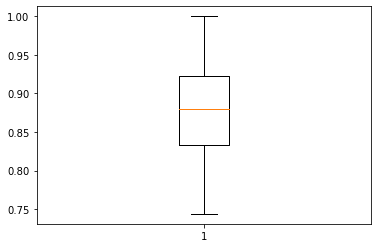

In [9]:
plt.boxplot(df['Alcohol']) 
plt.show()

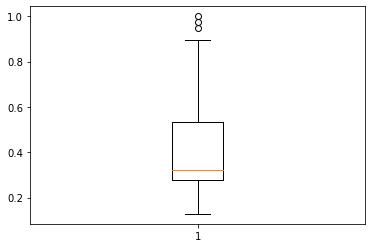

In [10]:
plt.boxplot(df['Malic.acid']) 
plt.show()

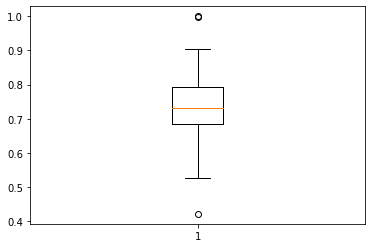

In [11]:
plt.boxplot(df['Ash']) 
plt.show()

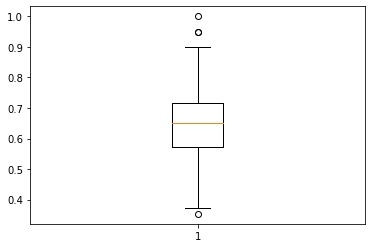

In [12]:
plt.boxplot(df['Acl']) 
plt.show()

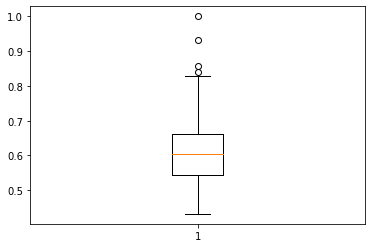

In [13]:
plt.boxplot(df['Mg']) 
plt.show()

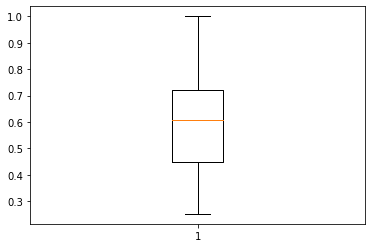

In [14]:
plt.boxplot(df['Phenols']) 
plt.show()

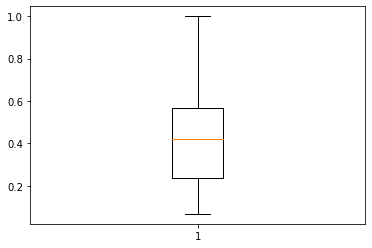

In [15]:
plt.boxplot(df['Flavanoids']) 
plt.show()

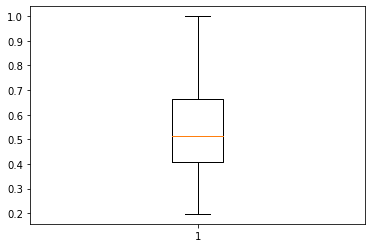

In [16]:
plt.boxplot(df['Nonflavanoid.phenols']) 
plt.show()

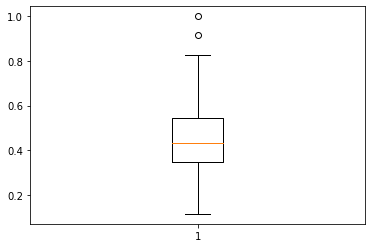

In [17]:
plt.boxplot(df['Proanth']) 
plt.show()

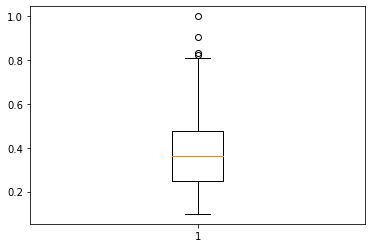

In [18]:
plt.boxplot(df['Color.int']) 
plt.show()

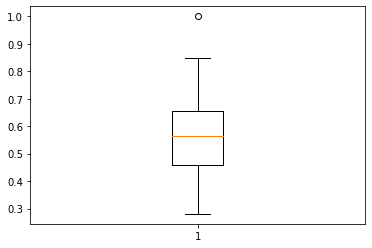

In [19]:
plt.boxplot(df['Hue']) 
plt.show()

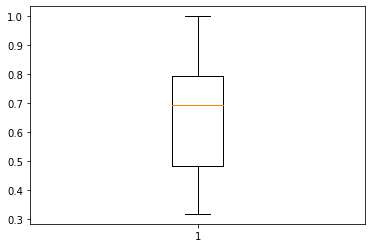

In [20]:
plt.boxplot(df['OD']) 
plt.show()

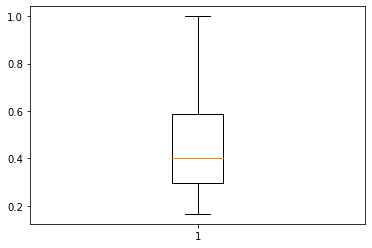

In [21]:
plt.boxplot(df['Proline']) 
plt.show()

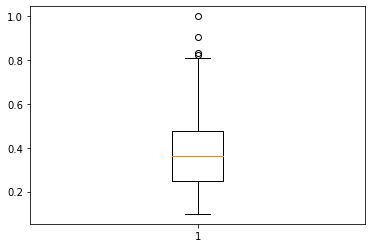

In [22]:
plt.boxplot(df['Color.int']) 
plt.show()

2.Histograms

<function matplotlib.pyplot.show(*args, **kw)>

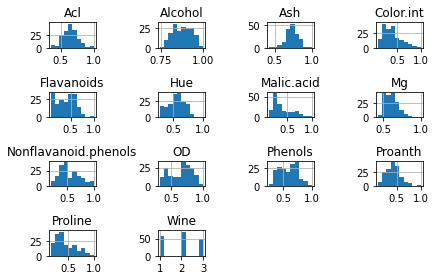

<Figure size 1440x720 with 0 Axes>

In [23]:
df.hist()
plt.tight_layout()
plt.show

3.Scatter plots

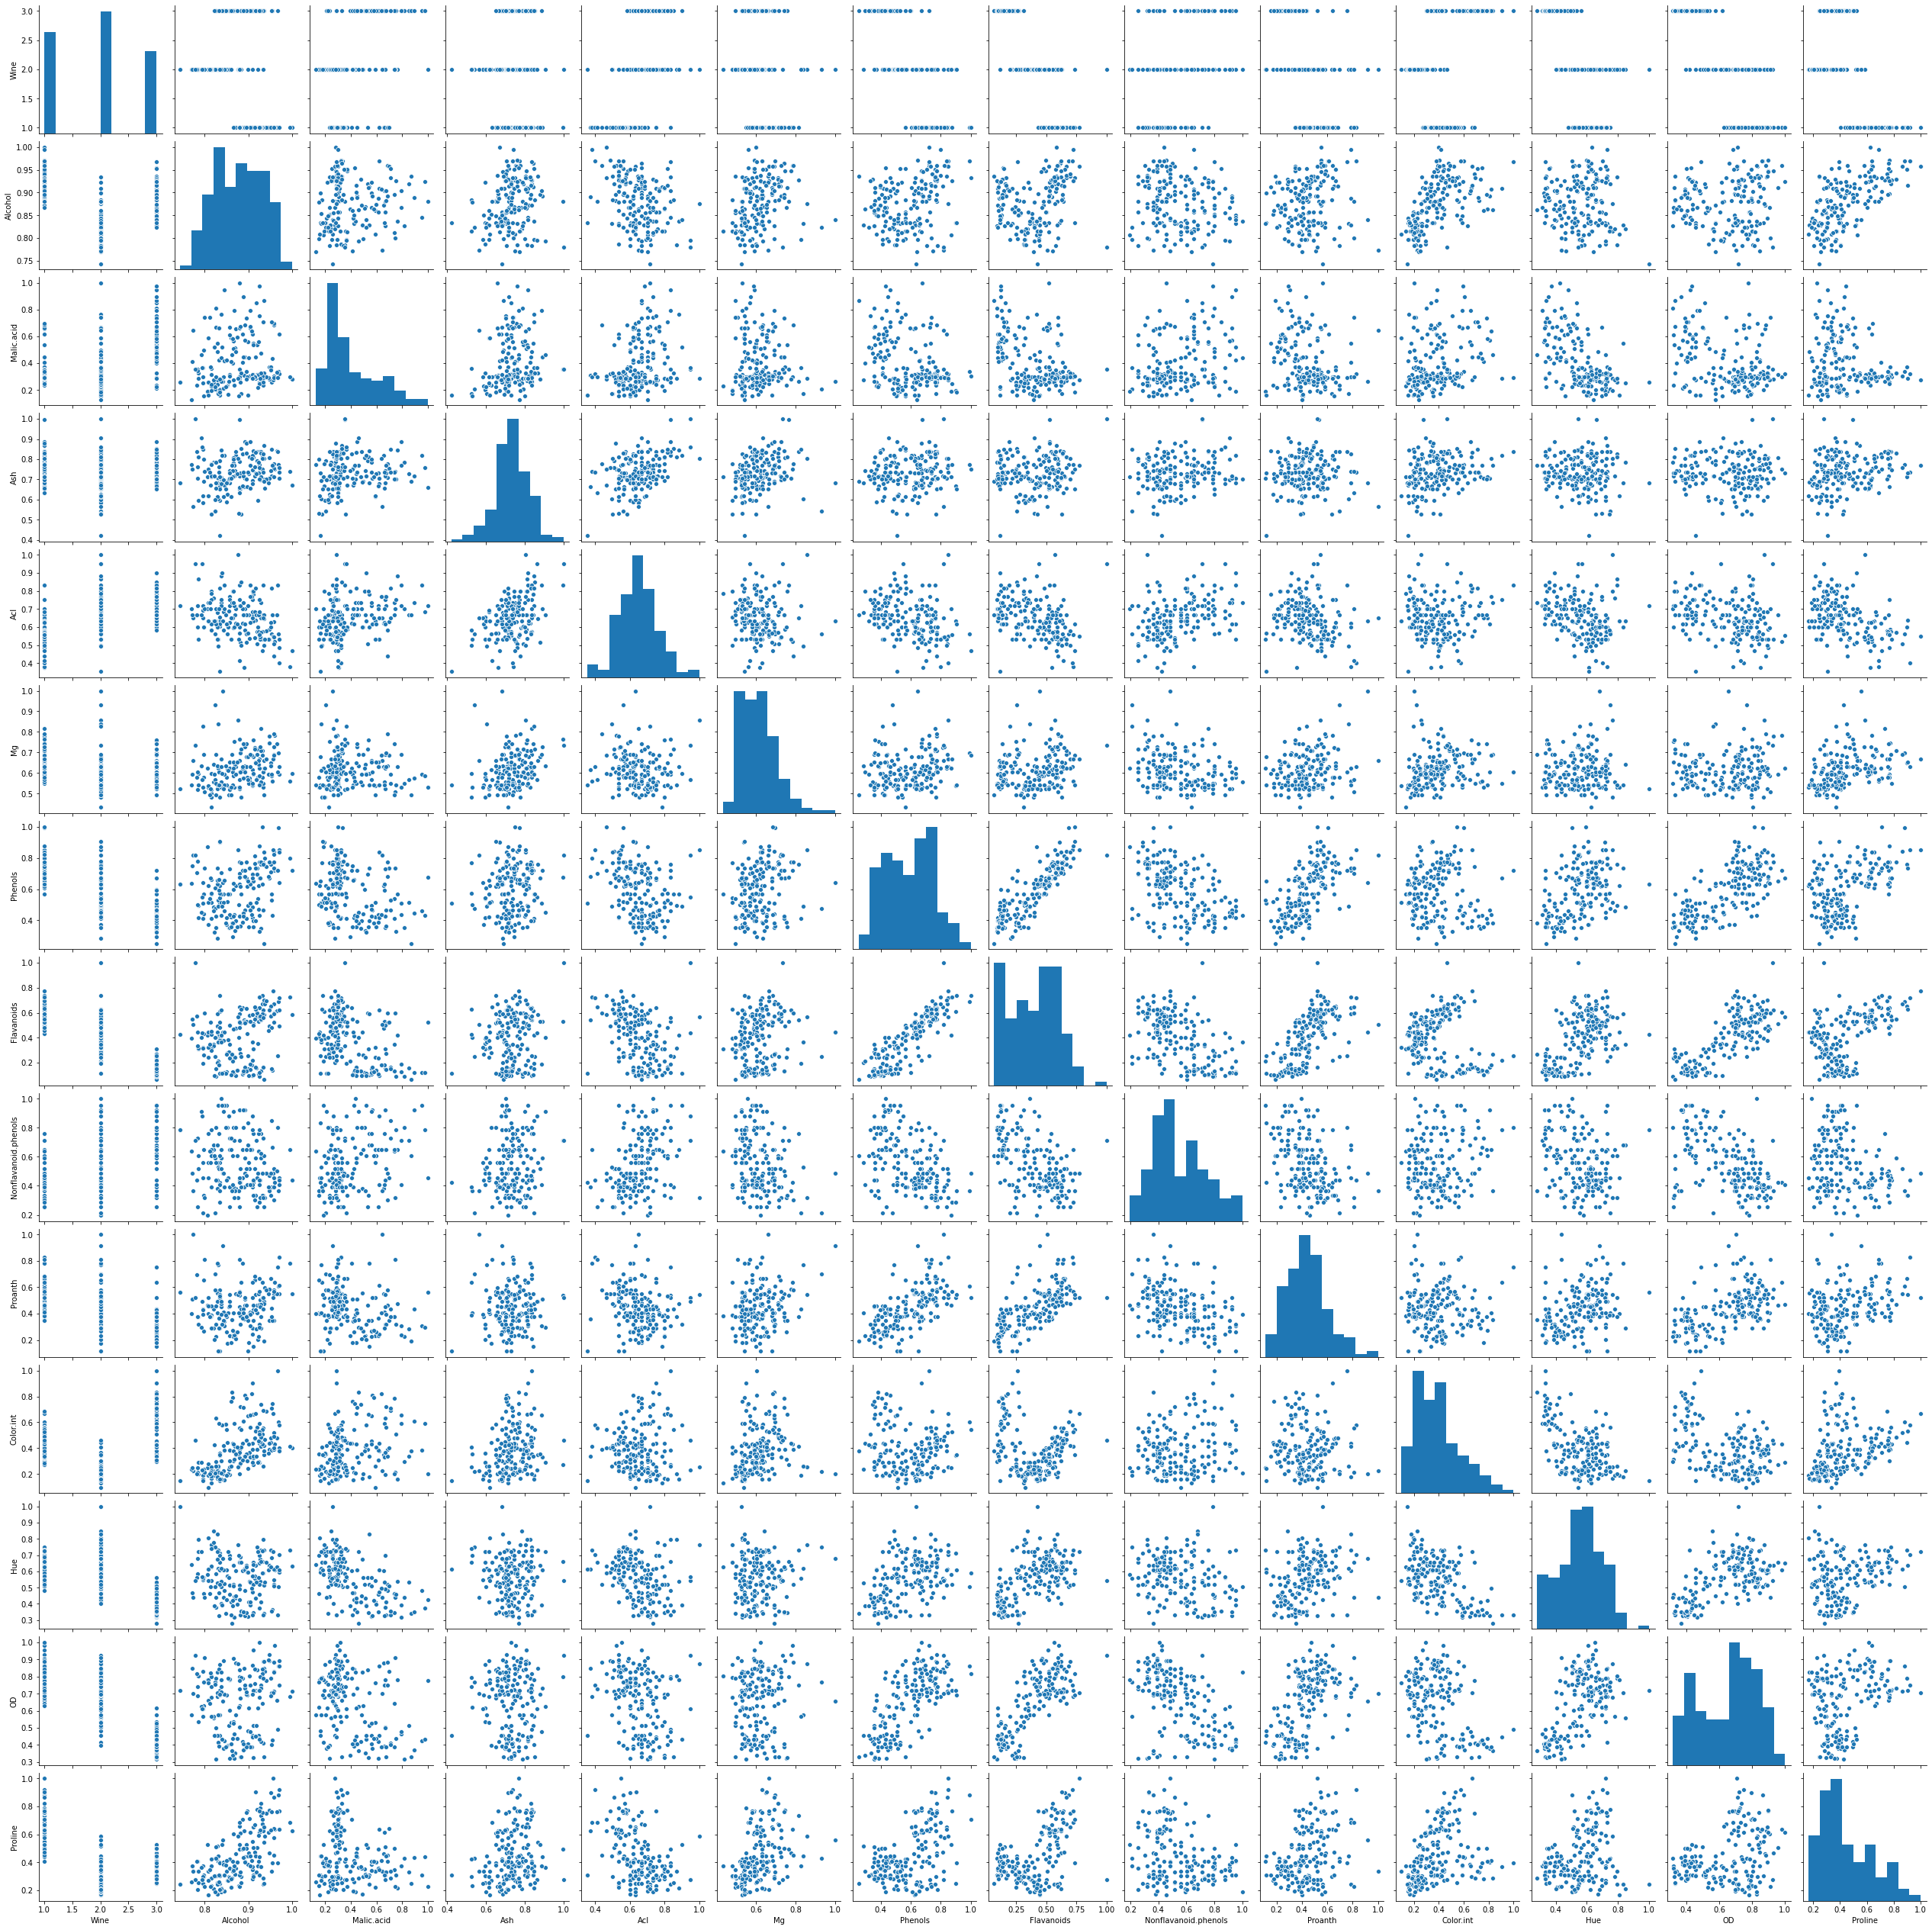

In [24]:
sns.pairplot(df)

SPLITTING DATASET INTO TRAIN AND TEST SETS

In [25]:
X=df.drop('Wine',axis='columns')
Y=df.Wine
X_train, X_test, Y_train, Y_test =model_selection. train_test_split(X, Y, test_size = 1/3, random_state = 0)

BUILDING AND EVALUATING CLASSIFICATION ALGORITHMS

In [26]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
results=[]
names=[]

for name,model in models:
    kfold=model_selection.KFold(n_splits=10)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg='%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.965909 (0.041804)
LDA: 0.966667 (0.055277)
KNN: 0.957576 (0.056509)
CART: 0.890152 (0.099945)
NB: 0.982576 (0.034890)
SVM: 0.957576 (0.056509)


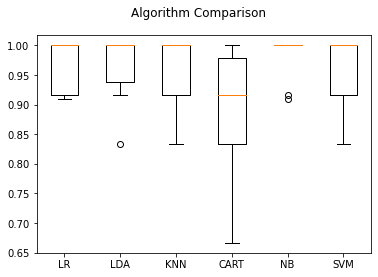

In [27]:
#Comparing Algorithms

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
#making predictions on validation dataset with KNN classifier

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions=knn.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.9333333333333333
[[20  0  0]
 [ 4 20  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        20
           2       1.00      0.83      0.91        24
           3       1.00      1.00      1.00        16

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



In [30]:
#making predictions on validation dataset with SMV classifier

SMV=SVC()
SMV.fit(X_train,Y_train)
predictions=SMV.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.9833333333333333
[[20  0  0]
 [ 0 23  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.96      0.98        24
           3       0.94      1.00      0.97        16

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



In [31]:
#making predictions on validation dataset with CART(Decision Tree Classifier)

CART=DecisionTreeClassifier()
CART.fit(X_train,Y_train)
predictions=CART.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.8833333333333333
[[19  1  0]
 [ 5 18  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1       0.79      0.95      0.86        20
           2       0.95      0.75      0.84        24
           3       0.94      1.00      0.97        16

    accuracy                           0.88        60
   macro avg       0.89      0.90      0.89        60
weighted avg       0.89      0.88      0.88        60

